# **Regression Project: Boston House Price Prediction**

# **Marks: 60**

Welcome to the project on regression. We will use the **Boston house price dataset** for this project.

-------------------------------
## **Objective**
-------------------------------

The problem at hand is to **predict the housing prices of a town or a suburb based on the features of the locality provided to us**. In the process, we need to **identify the most important features affecting the price of the house**. We need to employ techniques of data preprocessing and build a linear regression model that predicts the prices for the unseen data.

----------------------------
## **Dataset**
---------------------------

Each record in the database describes a house in Boston suburb or town. The data was drawn from the Boston Standard Metropolitan Statistical Area (SMSA) in 1970. Detailed attribute information can be found below:

Attribute Information:

- **CRIM:** Per capita crime rate by town
- **ZN:** Proportion of residential land zoned for lots over 25,000 sq.ft.
- **INDUS:** Proportion of non-retail business acres per town
- **CHAS:** Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
- **NOX:** Nitric Oxide concentration (parts per 10 million)
- **RM:** The average number of rooms per dwelling
- **AGE:** Proportion of owner-occupied units built before 1940
- **DIS:** Weighted distances to five Boston employment centers
- **RAD:** Index of accessibility to radial highways
- **TAX:** Full-value property-tax rate per 10,000 dollars
- **PTRATIO:** Pupil-teacher ratio by town
- **LSTAT:** % lower status of the population
- **MEDV:** Median value of owner-occupied homes in 1000 dollars

## **Importing the necessary libraries**

In [104]:
# Libraries to help with reading and manipulating data
import numpy as np
import pandas as pd

# Libaries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns
import pylab
import scipy.stats as stats

# Removes the limit for the number of displayed columns
pd.set_option("display.max_columns", None)

# Sets the limit for the number of displayed rows
pd.set_option("display.max_rows", 100)


# Libaries to split the data, preprocessing and Linear regression 
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from statsmodels.formula.api import ols
import statsmodels.api as sm
from statsmodels.stats.diagnostic import het_white
from statsmodels.compat import lzip
import statsmodels.stats.api as sms
from statsmodels.compat import lzip
from statsmodels.stats.outliers_influence import variance_inflation_factor

import warnings
warnings.filterwarnings("ignore")

### Loading the dataset

In [105]:
data = pd.read_csv('Boston.csv')

## Data Overview

- Observations
- Sanity checks

In [106]:
data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,5.33,36.2


In [107]:
# Check for data types 
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 13 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    int64  
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    int64  
 10  PTRATIO  506 non-null    float64
 11  LSTAT    506 non-null    float64
 12  MEDV     506 non-null    float64
dtypes: float64(10), int64(3)
memory usage: 51.5 KB


In [108]:
# check for any null values 
data.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
LSTAT      0
MEDV       0
dtype: int64

In [109]:
# check for any duplicate values 
data.duplicated().sum()

0

### ================================= Observations  ======================================================== 

- There are no null values 
- There are no duplicate values 
- **MEDV** is the main variable and rest all are independent variables which can be leveraged for prediction 
- All columns are numeric data type 

## Exploratory Data Analysis (EDA)

- EDA is an important part of any project involving data.
- It is important to investigate and understand the data better before building a model with it.
- A few questions have been mentioned below which will help you approach the analysis in the right manner and generate insights from the data.
- A thorough analysis of the data, in addition to the questions mentioned below, should be done.

**Questions:**

1. What does the distribution of 'MEDV' look like?
2. What can we infer form the correlation heatmap? Is there correlation between the dependent and independent variables?
3. What are all the inferences that can be found by doing univariate analysis for different variables?
4. Do bivariate analysis to visualize the relationship between the features having significant correlations (>= 0.7 or <= -0.7)

In [110]:
# Stats summary 
data.describe(include = "all").T

,count,mean,std,min,25%,50%,75%,max
CRIM,506.0,3.613524,8.601545,0.00632,0.082045,0.25651,3.677083,88.9762
ZN,506.0,11.363636,23.322453,0.00000,0.000000,0.00000,12.500000,100.0000
INDUS,506.0,11.136779,6.860353,0.46000,5.190000,9.69000,18.100000,27.7400
CHAS,506.0,0.069170,0.253994,0.00000,0.000000,0.00000,0.000000,1.0000
NOX,506.0,0.554695,0.115878,0.38500,0.449000,0.53800,0.624000,0.8710
RM,506.0,6.284634,0.702617,3.56100,5.885500,6.20850,6.623500,8.7800
AGE,506.0,68.574901,28.148861,2.90000,45.025000,77.50000,94.075000,100.0000
DIS,506.0,3.795043,2.105710,1.12960,2.100175,3.20745,5.188425,12.1265
RAD,506.0,9.549407,8.707259,1.00000,4.000000,5.00000,24.000000,24.0000
TAX,506.0,408.237154,168.537116,187.00000,279.000000,330.00000,666.000000,711.0000


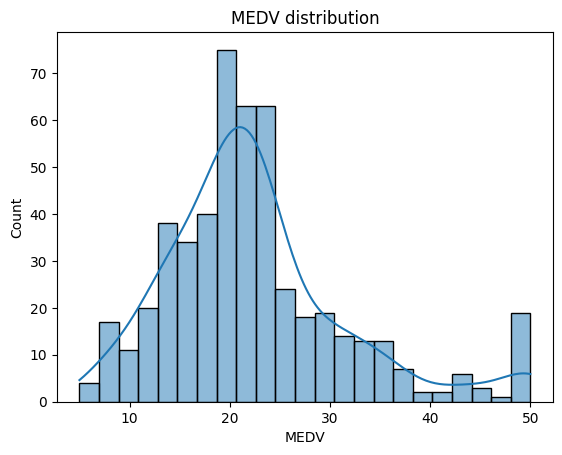

In [111]:
# MEDV distribution using histogram 
sns.histplot(data['MEDV'], fill=True,kde=True)
plt.title("MEDV distribution")
plt.show()

### ================================= Univariate Analysis  ======================================================== 

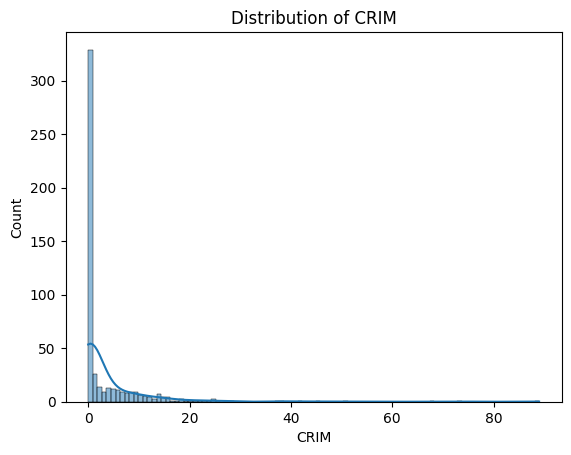

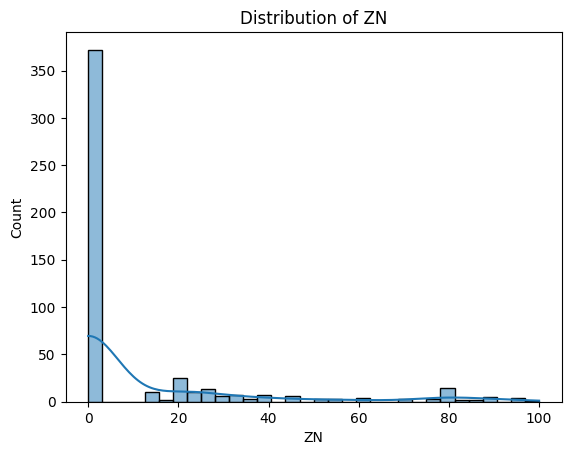

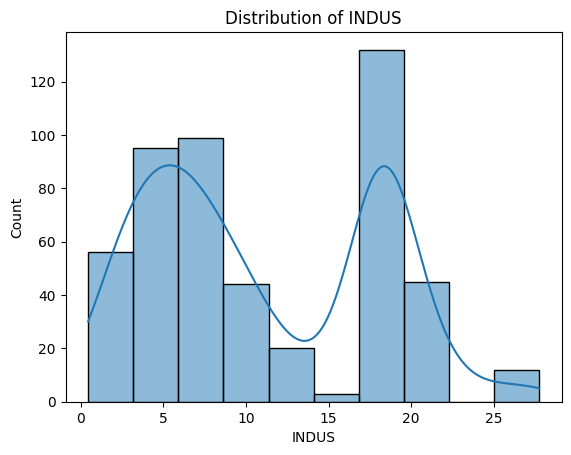

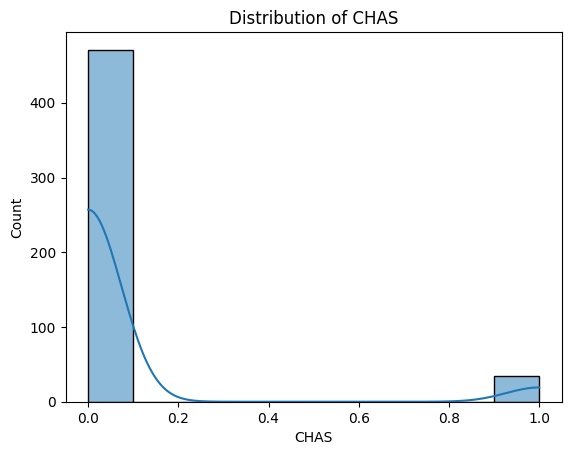

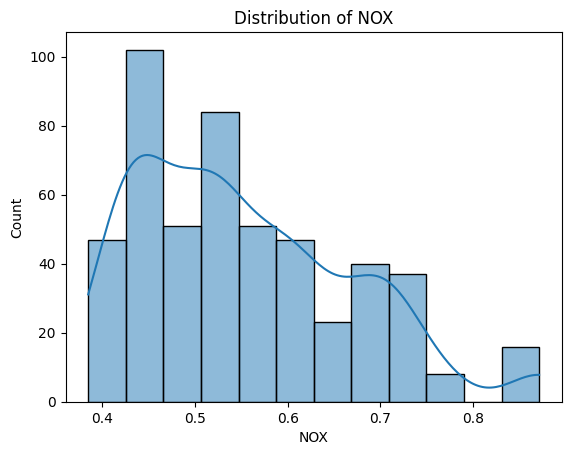

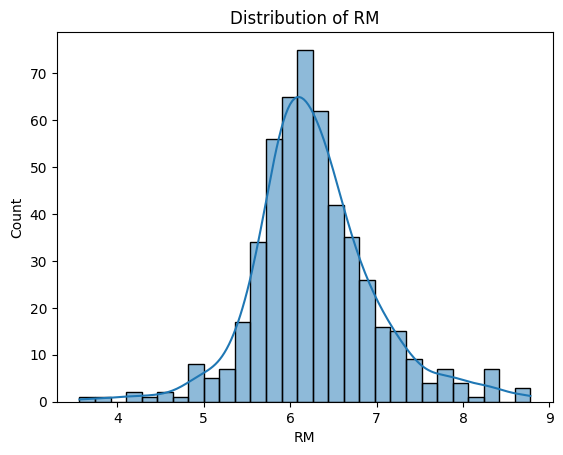

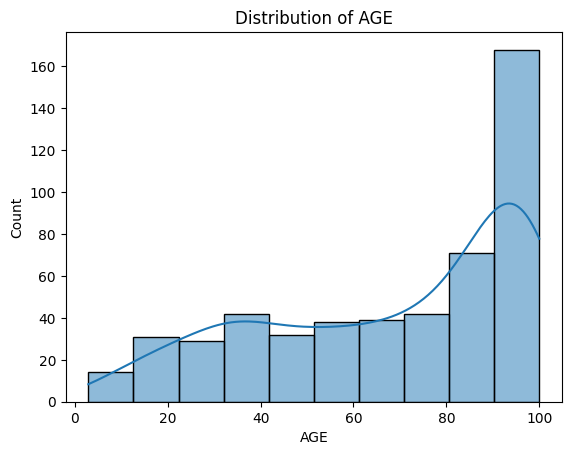

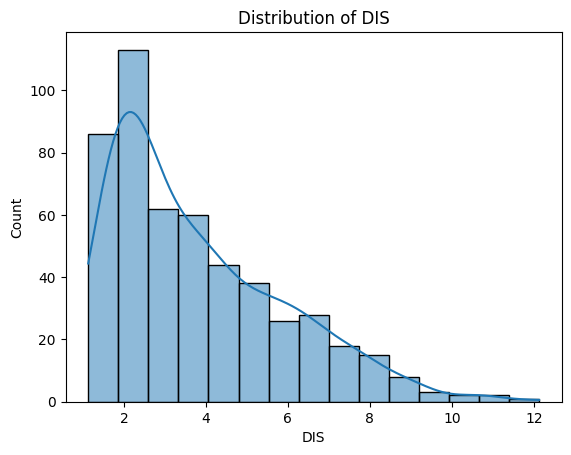

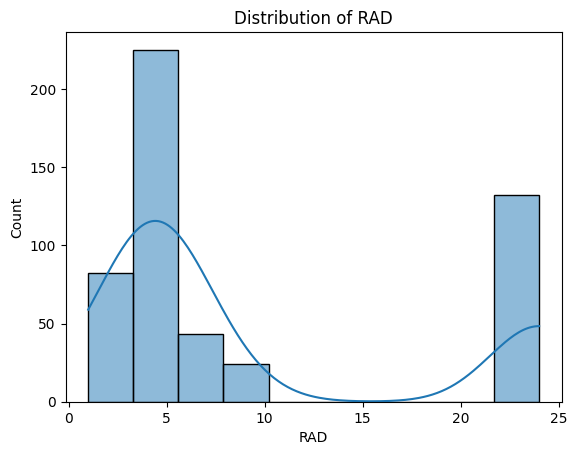

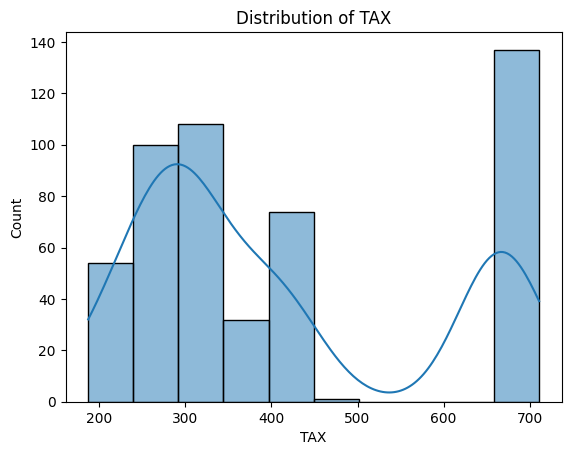

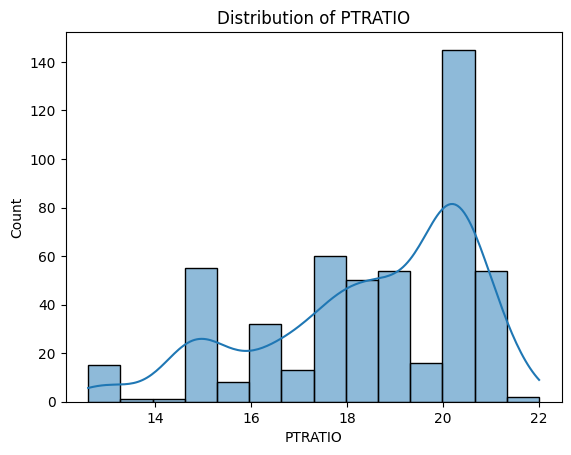

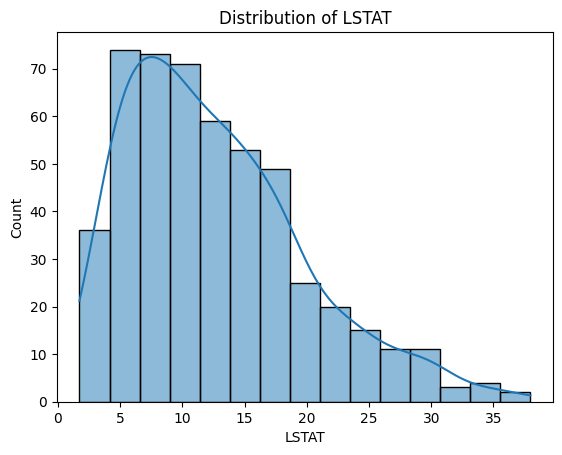

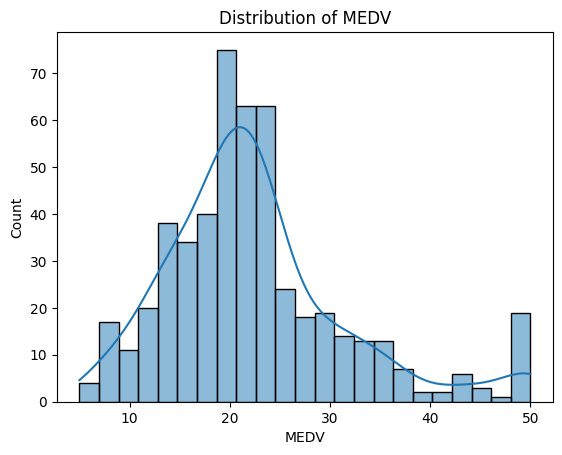

In [112]:
# Histogram column Plots
for column in data.columns:
    sns.histplot(data[column], fill=True,kde=True)
    plt.title(f'Distribution of {column}')
    plt.show()   

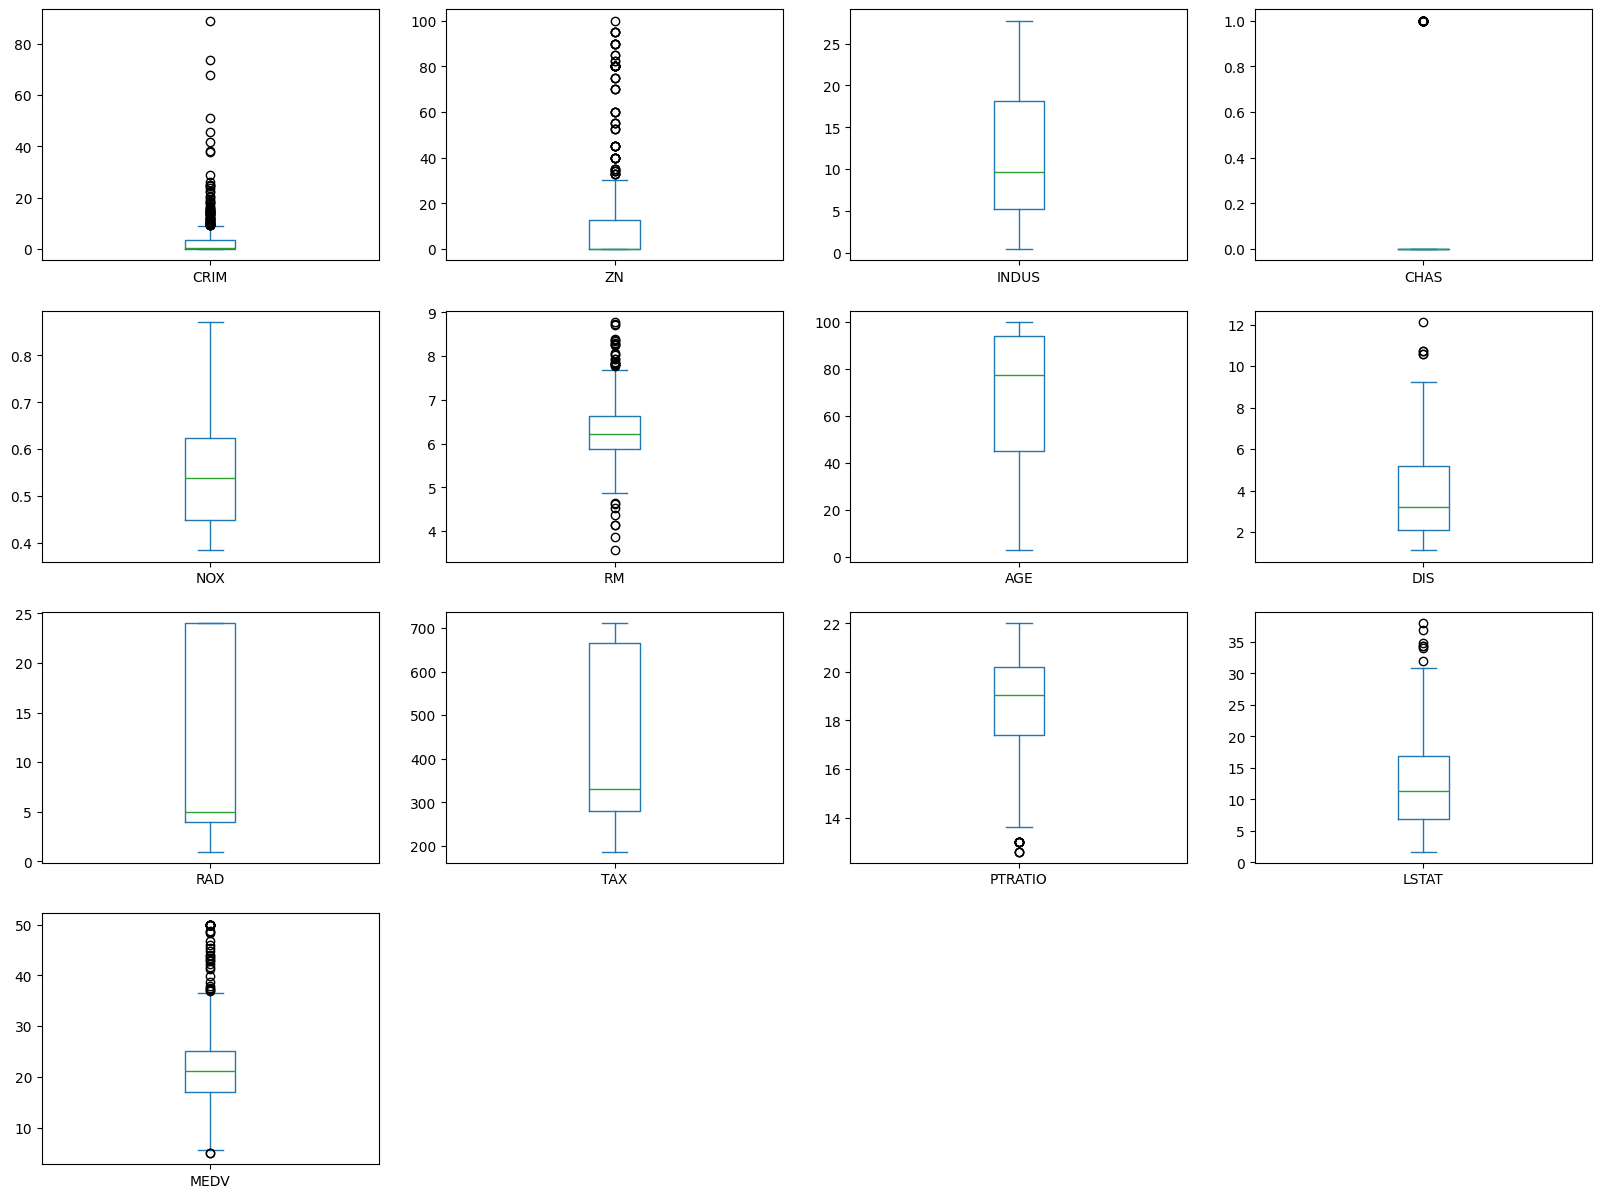

In [113]:
# Box plot for all variables 
data.plot(kind='box', subplots=True, layout=(4, 4), sharex=False, sharey=False, figsize=(20, 15))
plt.show()

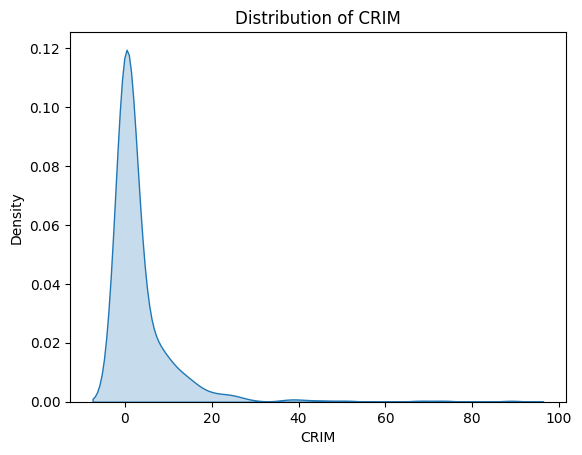

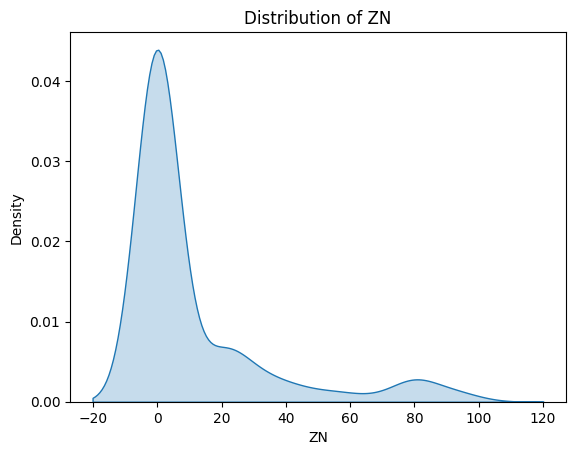

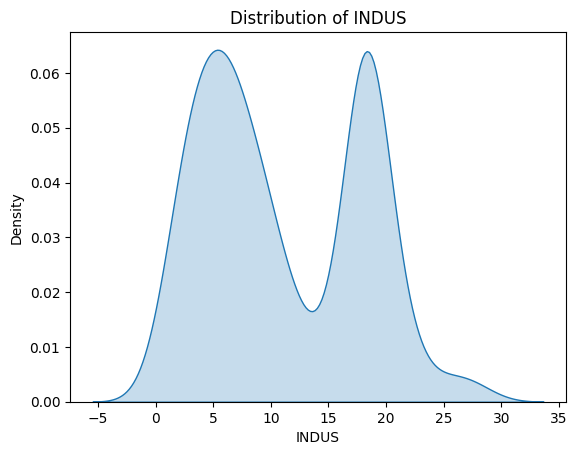

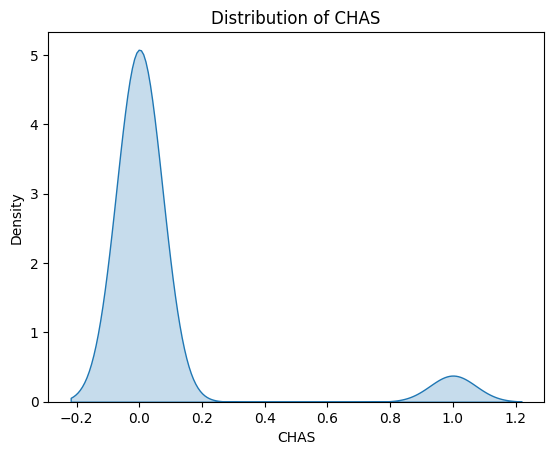

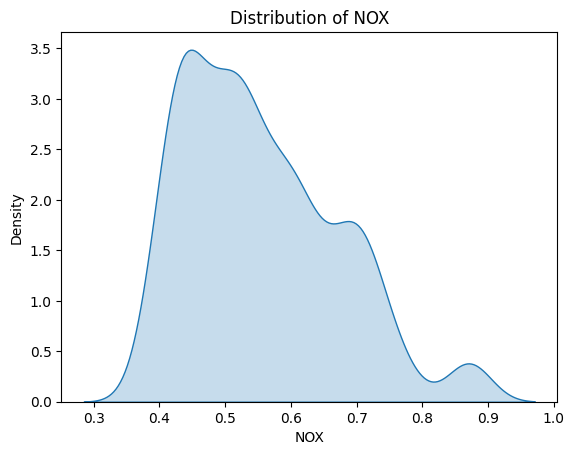

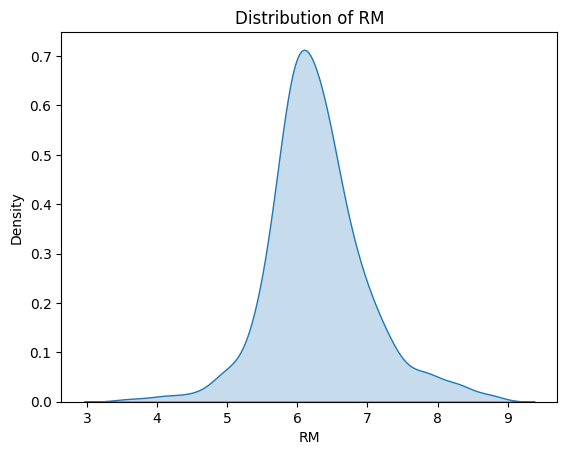

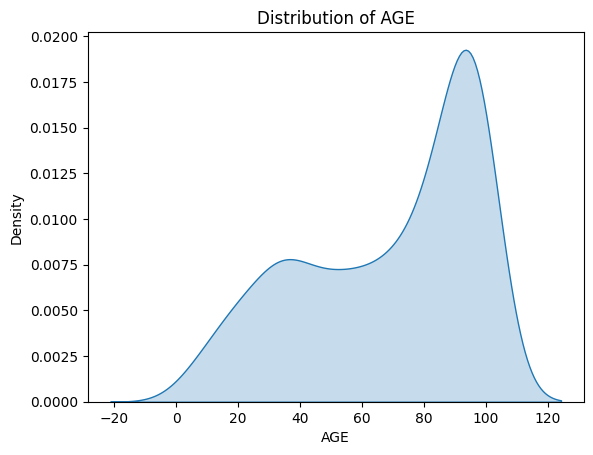

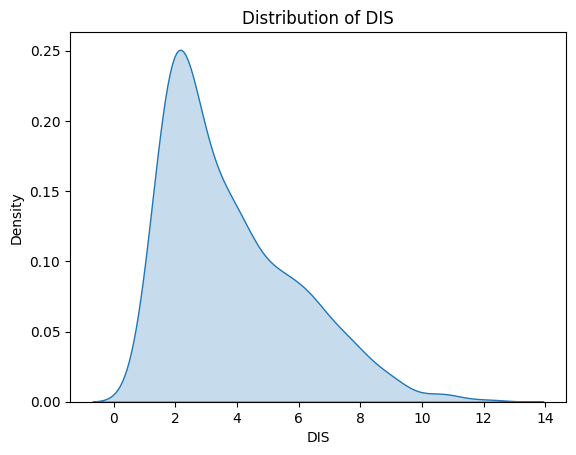

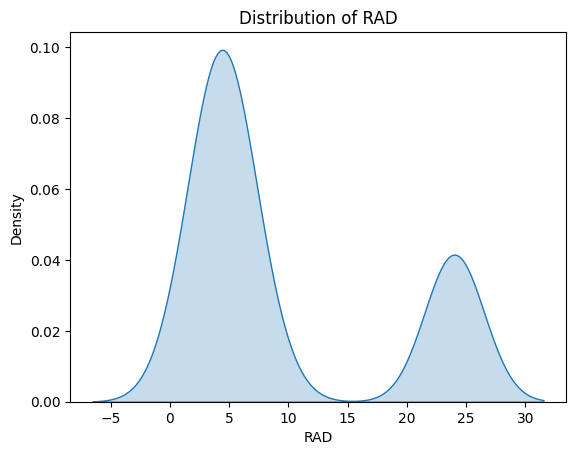

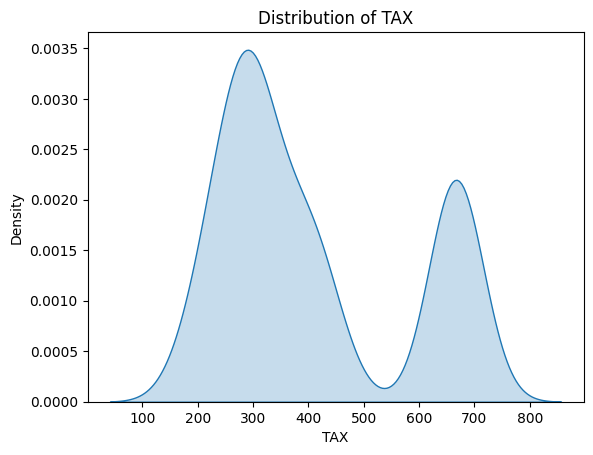

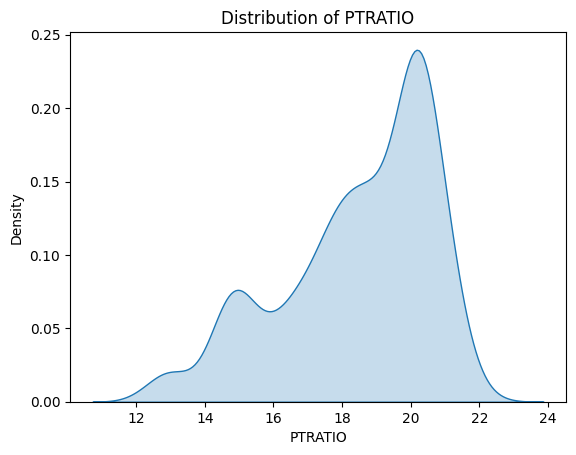

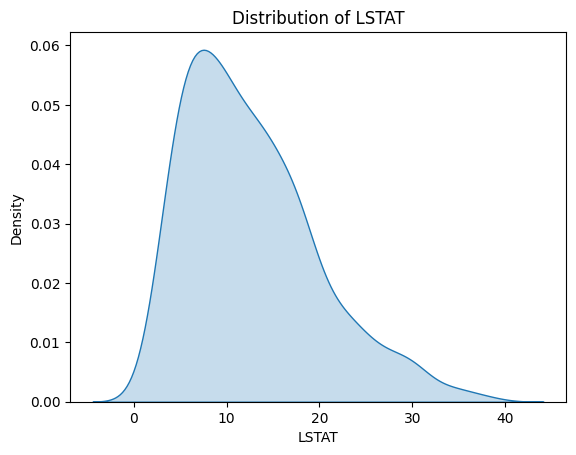

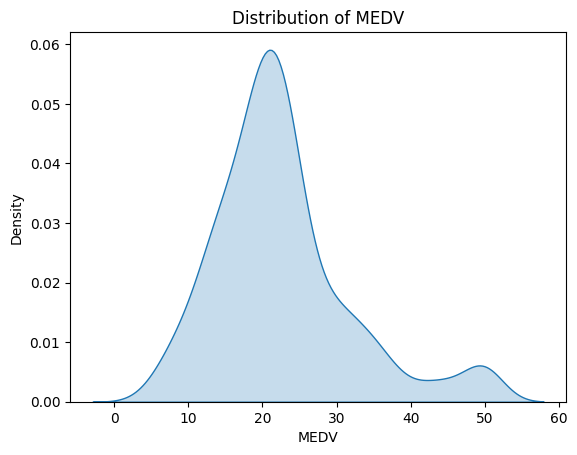

In [114]:
# KDE Plots
for column in data.columns:
    sns.kdeplot(data[column], fill=True)
    plt.title(f'Distribution of {column}')
    plt.show()

### ================================= bivariate Analysis  ======================================================== 

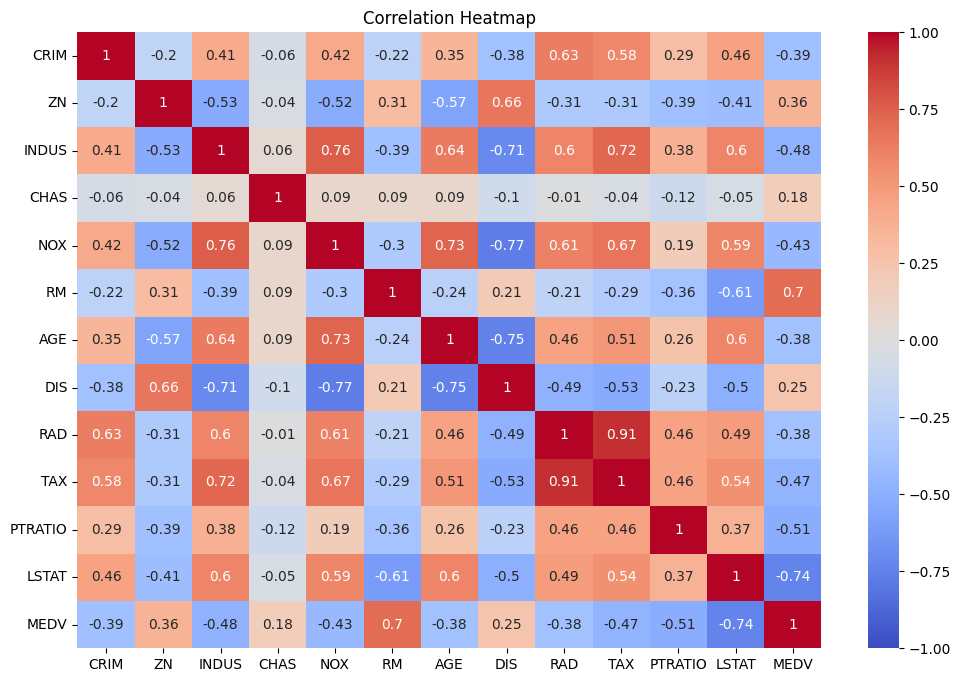

In [115]:
corr_matrix = data.corr().round(2)

# Heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(data=corr_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Heatmap')
plt.show()

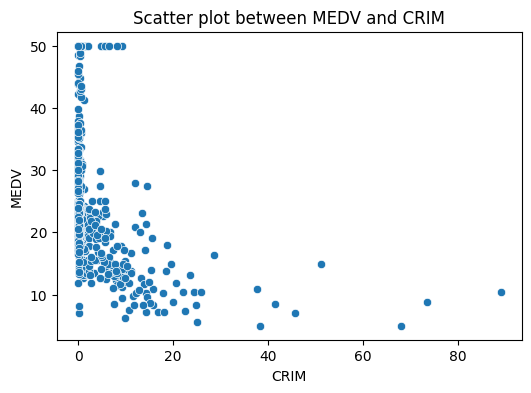

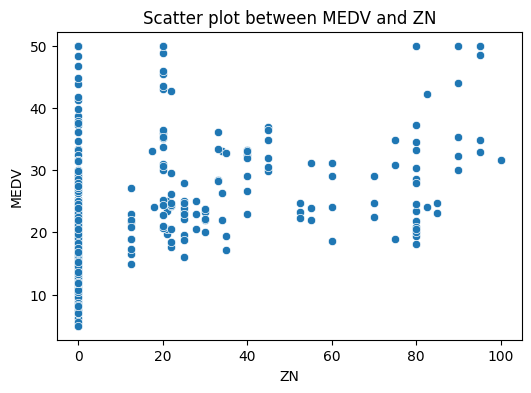

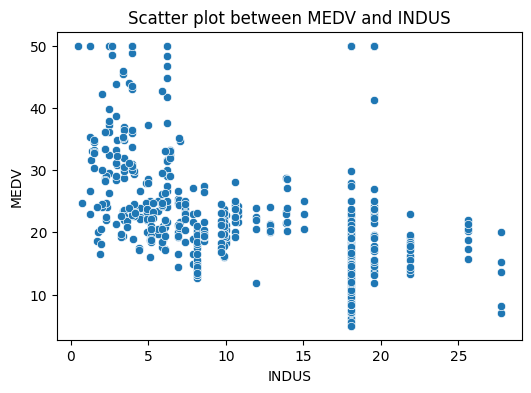

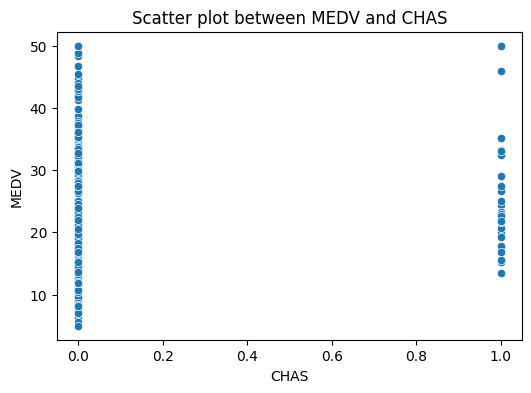

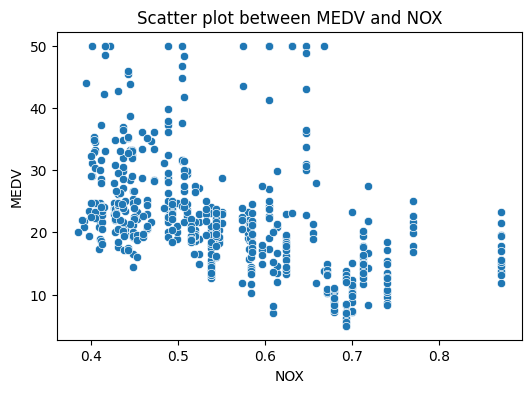

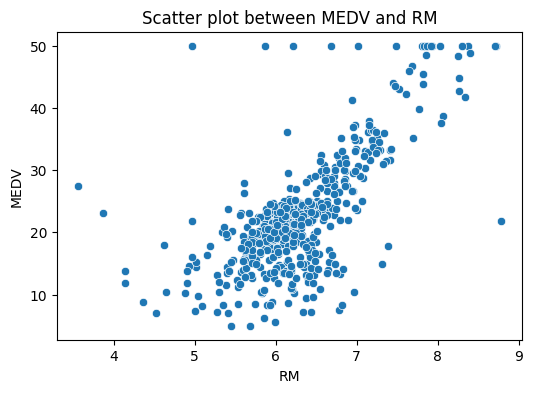

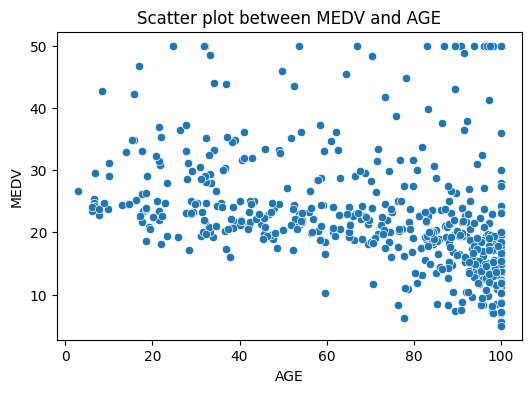

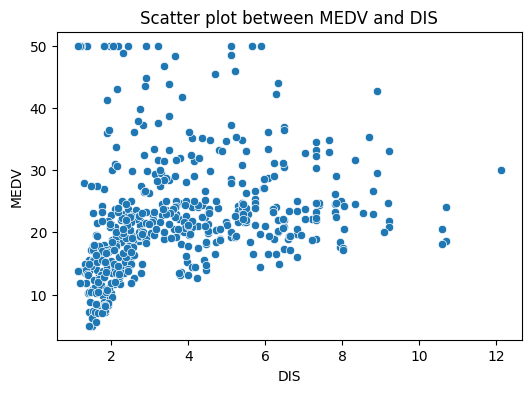

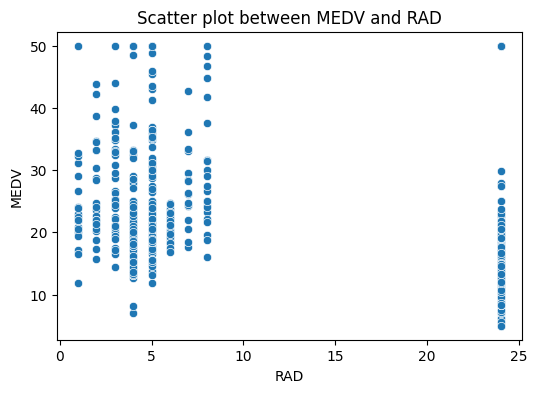

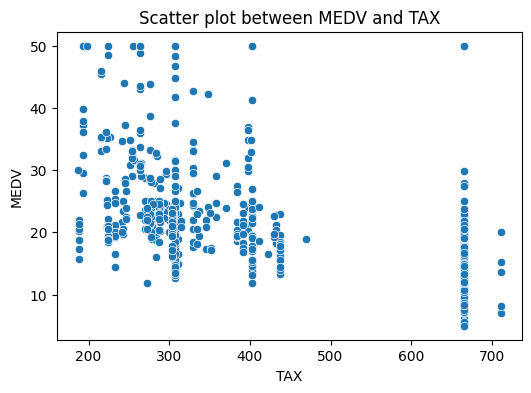

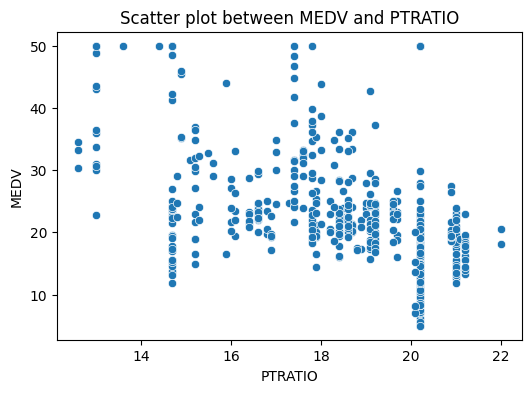

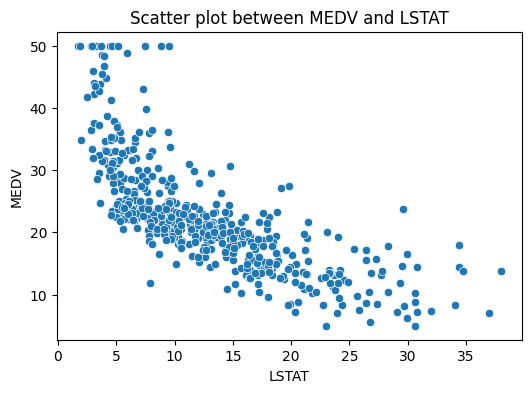

In [116]:
# Finding significant correlations
significant_corrs = corr_matrix[(corr_matrix >= 0.7) | (corr_matrix <= -0.7)]
significant_corrs = significant_corrs.dropna(how='all', axis=0).dropna(how='all', axis=1)

# Scatter plots for significant correlations to find inferences 
for col in significant_corrs.columns:
    if col != 'MEDV':
        plt.figure(figsize=(6, 4))
        sns.scatterplot(data=data, x=col, y='MEDV')
        plt.title(f'Scatter plot between MEDV and {col}')
        plt.xlabel(col)
        plt.ylabel('MEDV')
        plt.show()

### ================================= Observations ======================================================== 

Variables which have positive impact on Housing price 

- RM (The average number of rooms per dwelling)
- DIS (Weighted distances to five Boston employment centers)
- RAD (Index of accessibility to radial highways)
- PTRATIO (Pupil-teacher ratio by town)

Variables which have negative impact on Housing price 

- CRIM (Per capita crime rate by town)
- NOX (Nitric Oxide concentration)
- LSTAT (lower status of the population)

## Data Preprocessing

- Missing value treatment
- Log transformation of dependent variable if skewed
- Feature engineering (if needed)
- Outlier detection and treatment (if needed)
- Preparing data for modeling
- Any other preprocessing steps (if needed)

In [117]:
## checking for missing values
missing_values = data.isnull().sum()
print("Missing values in each column:\n", missing_values)

Missing values in each column:
 CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
LSTAT      0
MEDV       0
dtype: int64


##### Observations - No missing values 

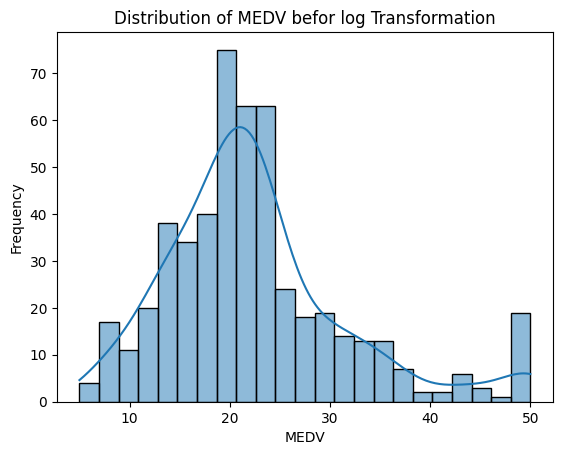

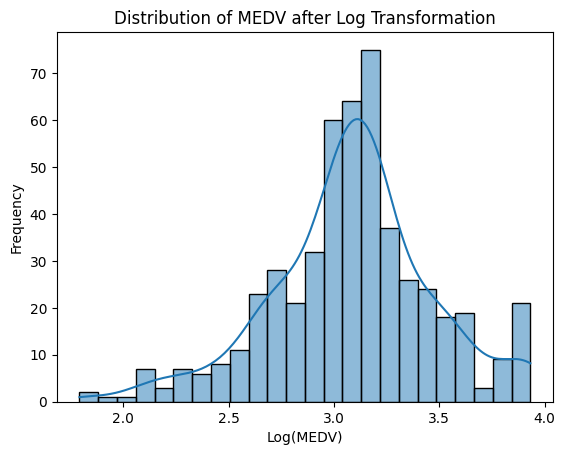

In [118]:
# MEDV distribution 
sns.histplot(data['MEDV'], kde=True)
plt.title('Distribution of MEDV befor log Transformation')
plt.xlabel('MEDV')
plt.ylabel('Frequency')
plt.show()

# Applying log transformation
data['MEDV_log'] = np.log1p(data['MEDV'])

# Checking the distribution again
sns.histplot(data['MEDV_log'], kde=True)
plt.title('Distribution of MEDV after Log Transformation')
plt.xlabel('Log(MEDV)')
plt.ylabel('Frequency')
plt.show()

##### Observations - Log transformation has been applied to MEDV

In [119]:
# Splitting the data into features and target
X = data.drop(columns=['MEDV','MEDV_log'])
Y = data['MEDV_log']
X = sm.add_constant(X)

# Splitting into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.3, random_state = 42)

## Model Building - Linear Regression

In [120]:
model1 = sm.OLS(y_train, X_train).fit()
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               MEDV_log   R-squared:                       0.782
Model:                            OLS   Adj. R-squared:                  0.775
Method:                 Least Squares   F-statistic:                     102.1
Date:                Mon, 29 Jul 2024   Prob (F-statistic):          4.99e-105
Time:                        02:04:27   Log-Likelihood:                 99.408
No. Observations:                 354   AIC:                            -172.8
Df Residuals:                     341   BIC:                            -122.5
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          4.1402      0.224     18.522      0.000       3.701       4.580
CRIM          -0.0103      0.002     -6.546      0.000      -0.013      -0.007
ZN             0.0009      0.001      1.377      0.169      -0.000       0.002
INDUS          0.0022      0.003      0.782      0.434      -0.003       0.008
CHAS           0.1137      0.040      2.867      0.004       0.036       0.192
NOX           -0.6455      0.182     -3.539      0.000      -1.004      -0.287
RM             0.0896      0.019      4.722      0.000       0.052       0.127
AGE           -0.0002      0.001     -0.244      0.808      -0.001       0.001
DIS           -0.0444      0.009     -4.782      0.000      -0.063      -0.026
RAD            0.0092      0.003      2.933      0.004       0.003       0.015
TAX           -0.0005      0.000     -2.543      0.011      -0.001      -0.000
PTRATIO       -0.0333      0.006     -5.630      0.000      -0.045      -0.022
LSTAT         -0.0295      0.002    -13.061      0.000      -0.034      -0.025
==============================================================================
Omnibus:                       30.517   Durbin-Watson:                   2.124
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               83.989
Skew:                           0.366   Prob(JB):                     5.78e-19
Kurtosis:                       5.271   Cond. No.                     1.16e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.16e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

## Model Performance Check

1. How does the model is performing? Check using Rsquared, RSME, MAE, MAPE
2. Is there multicollinearity? Check using VIF
3. How does the model is performing after cross validation?

In [121]:
#### Common function for checking model performance 

from sklearn.metrics import r2_score, mean_absolute_percentage_error, mean_absolute_error, mean_squared_error

# Model Performance on test and train data
def model_pref(olsmodel, x_train, x_test):

    # In-sample Prediction
    y_pred_train = olsmodel.predict(x_train)
    y_observed_train = y_train

    # Prediction on test data
    y_pred_test = olsmodel.predict(x_test)
    y_observed_test = y_test

    print(
        pd.DataFrame(
            {
                "Data": ["Train", "Test"],
                "RMSE": [
                    np.sqrt(mean_squared_error(y_pred_train, y_observed_train)),
                    np.sqrt(mean_squared_error(y_pred_test, y_observed_test)),
                ],
                "MAE": [
                    mean_absolute_error(y_pred_train, y_observed_train),
                    mean_absolute_error(y_pred_test, y_observed_test),
                ],
                
                "r2": [
                    r2_score(y_pred_train, y_observed_train),
                    r2_score(y_pred_test, y_observed_test),
                ],
            }
        )
    )

In [122]:
## Model 1 performance 
model_pref(model1, X_train, X_test)

    Data      RMSE       MAE        r2
0  Train  0.182729  0.133255  0.721691
1   Test  0.176435  0.125320  0.748667


##### Observations - Test data is performing better than training data with slightly better score 

In [123]:
## check for multicollinearity

vif_data = pd.DataFrame()
vif_data["feature"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
print(vif_data)

    feature         VIF
0     const  535.526619
1      CRIM    1.767486
2        ZN    2.298459
3     INDUS    3.987181
4      CHAS    1.071168
5       NOX    4.369093
6        RM    1.912532
7       AGE    3.088232
8       DIS    3.954037
9       RAD    7.445301
10      TAX    9.002158
11  PTRATIO    1.797060
12    LSTAT    2.870777


##### Observations - Removing TAX and RAD columns since VIF is greater than 5

In [124]:
### Model 2 training 

X_train1=X_train.drop(columns=["TAX","RAD"], axis = 1)
X_test1=X_test.drop(columns=["TAX","RAD"], axis = 1)
model2 = sm.OLS(y_train, X_train1).fit()
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               MEDV_log   R-squared:                       0.777
Model:                            OLS   Adj. R-squared:                  0.770
Method:                 Least Squares   F-statistic:                     119.3
Date:                Mon, 29 Jul 2024   Prob (F-statistic):          3.01e-105
Time:                        02:04:27   Log-Likelihood:                 94.929
No. Observations:                 354   AIC:                            -167.9
Df Residuals:                     343   BIC:                            -125.3
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          3.9450      0.205     19.229      0.000       3.541       4.348
CRIM          -0.0091      0.001     -6.502      0.000      -0.012      -0.006
ZN             0.0005      0.001      0.822      0.412      -0.001       0.002
INDUS         -0.0004      0.003     -0.146      0.884      -0.005       0.005
CHAS           0.1293      0.040      3.260      0.001       0.051       0.207
NOX           -0.5857      0.171     -3.416      0.001      -0.923      -0.248
RM             0.0975      0.019      5.180      0.000       0.060       0.135
AGE           -0.0003      0.001     -0.456      0.649      -0.002       0.001
DIS           -0.0432      0.009     -4.608      0.000      -0.062      -0.025
PTRATIO       -0.0310      0.005     -5.779      0.000      -0.042      -0.020
LSTAT         -0.0292      0.002    -12.831      0.000      -0.034      -0.025
==============================================================================
Omnibus:                       33.966   Durbin-Watson:                   2.111
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               92.928
Skew:                           0.425   Prob(JB):                     6.62e-21
Kurtosis:                       5.362   Cond. No.                     1.84e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.84e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [125]:
# Check performance of model 2 
model_pref(model2, X_train1, X_test1)

    Data      RMSE       MAE        r2
0  Train  0.185055  0.134487  0.712509
1   Test  0.185243  0.130403  0.713892


##### Observations - model 1 is performing overall better with r2 scores 

## Checking Linear Regression Assumptions

- In order to make statistical inferences from a linear regression model, it is important to ensure that the assumptions of linear regression are satisfied.

In [126]:
### Check for mean residuals
residuals = model1.resid
np.mean(residuals)

8.260811996787181e-14

##### Observations - The mean of residuals is very close to 0.

In [127]:
### Check for homoscedasticity
name = ["F statistic", "p-value"]
test = sms.het_goldfeldquandt(y_train, X_train)
lzip(name, test)

[('F statistic', 0.904444557385681), ('p-value', 0.7395565573951906)]

##### Observations - Since p-value > 0.05 corresponding assumption is satisfied.

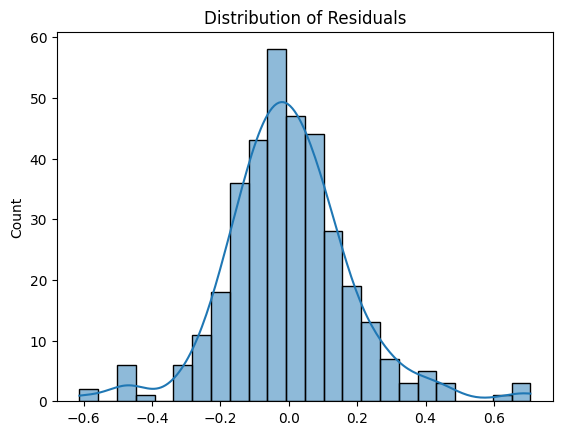

In [128]:
### Normality of error terms
sns.histplot(residuals, kde=True)
plt.title('Distribution of Residuals')
plt.show()

##### Observations - residuals are normally distributed.

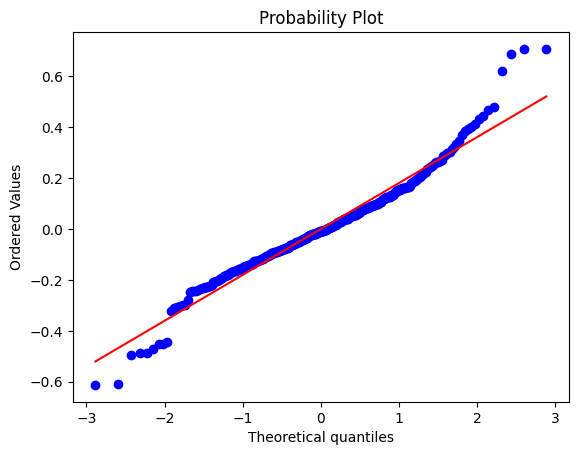

In [129]:
# Plot q-q plot of residuals
stats.probplot(residuals, dist = "norm", plot = pylab)
plt.show()

## Final Model

In [130]:
# Import the required function

from sklearn.model_selection import cross_val_score

# Build the regression model and cross-validate
linearregression = LinearRegression()

cv_Score11 = cross_val_score(linearregression, X_train, y_train, cv = 10)
cv_Score12 = cross_val_score(linearregression, X_train, y_train, cv = 10,
                             scoring = 'neg_mean_squared_error')


print("RSquared: %0.3f (+/- %0.3f)" % (cv_Score11.mean(), cv_Score11.std() * 2))
print("Mean Squared Error: %0.3f (+/- %0.3f)" % (-1*cv_Score12.mean(), cv_Score12.std() * 2))

RSquared: 0.742 (+/- 0.171)
Mean Squared Error: 0.038 (+/- 0.021)


## Actionable Insights and Recommendations 


### Insights 

- Model accurary around 74.2%. 
- Higher average room count positively correlates with higher housing prices. 
- Lower pupil-teacher ratios positively correlate with higher housing prices. 
- Proximity to employment centers positively influences housing prices.

### Recommedations 

- Building bigger houses with more room count, better school quality, closer to employment center will increase overall prices   
- Reducing concentration of NO2 
- Improving status by LSTAT population thru employment program etc can help in reducing LSTAT percentage which can influence prices 


___